In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df_test =pd.read_csv('test.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_original=df.copy()
test_original= df_test.copy()

## UNIVARIANT ANALYSIS

Analysing the data individually, but we'll first look at the TARGET VARIABLE
### TARGET VARIABLE

In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
#Normalize can be set to True to print the proportions instead 

In [9]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

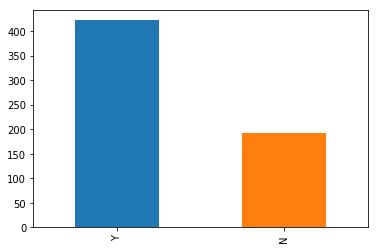

In [10]:
df['Loan_Status'].value_counts().plot(kind='bar')

### Independent Variable(Categorical)

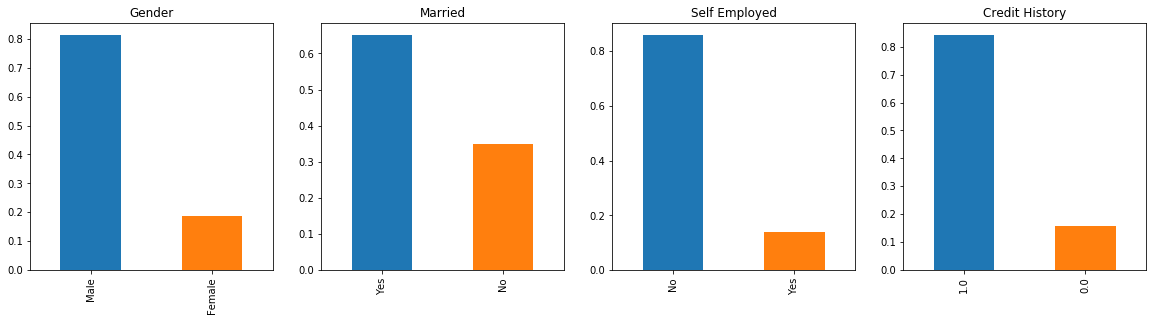

In [11]:
plt.figure(1)
plt.subplot(241)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')

plt.subplot(242)
df['Married'].value_counts(normalize=True).plot(kind='bar', title='Married')

plt.subplot(243)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

plt.subplot(244)
df.Credit_History.value_counts(normalize=True).plot.bar(title='Credit History')

plt.show()

The following conclusions can be arrived at from the above bar plots:
   
    *About 80% of the applicants are male
    *About 65% of the applicants are married
    *Only about 15% of the applicants are self employed
    *Around 85% of the applicants have repaid their debt

### Independent Variables(Ordinal)

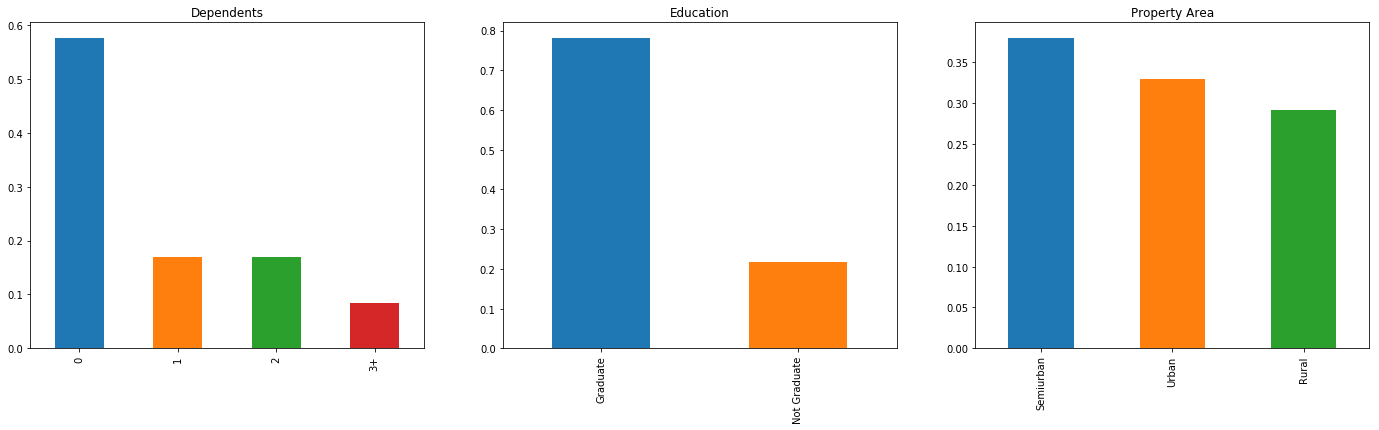

In [12]:
plt.figure(1)
plt.subplot(131)
df.Dependents.value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')

plt.subplot(132)
df.Education.value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
df.Property_Area.value_counts(normalize=True).plot.bar(title='Property Area')

plt.show()

Conclusion we can draw from the above bar charts include:

    *Most of the applicants do not have any dependent
    *About 80% of the applicants are graduates
    *Most of the applicants are from the semiurban areas

### Independent Variables(Numerical)

C:\Users\Ady\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


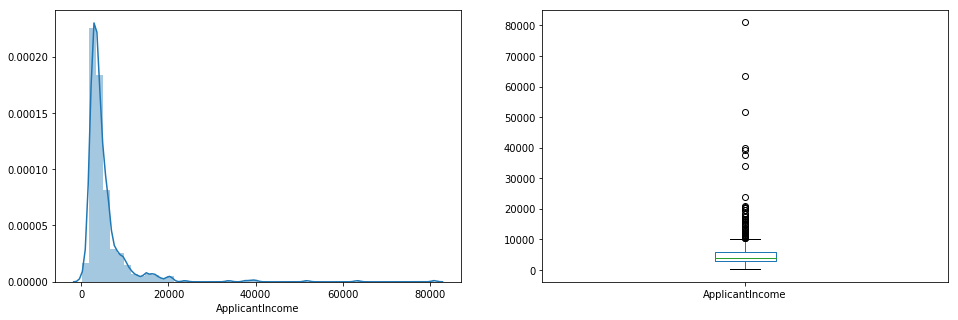

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']) #a distribution plot of the Applicants Income

plt.subplot(122)
df.ApplicantIncome.plot.box( figsize=(16,5))

plt.show()

It can be inferred from the above distribution plots that  most of the applicant income is to the left, which means it is not normally distributed(for normal distribution the peak should lie in between). We will try to make it normal as the algorithm works better if the data is normally distributed

The box plot confirms the presence of a lot of outliers. This could be as a result of the income difference in the society which could be as a result of different education levels

So let us segregate by education

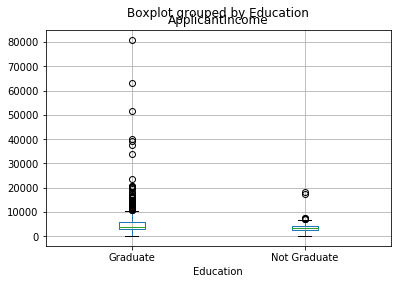

In [14]:
df.boxplot(column ='ApplicantIncome',by='Education')

C:\Users\Ady\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


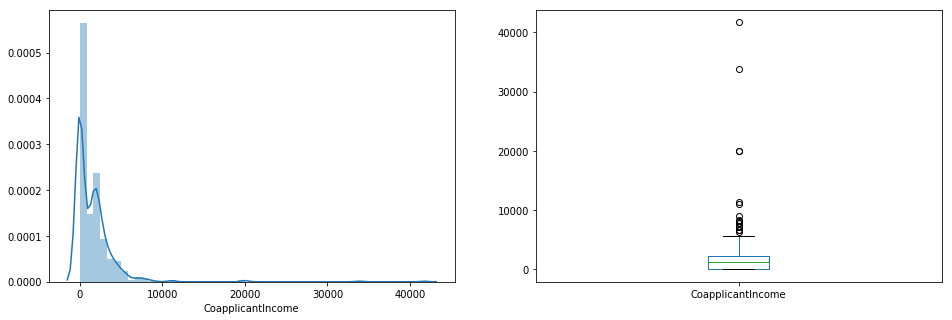

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df.CoapplicantIncome.plot.box(figsize=(16,5))

We see a similar case here as that of the Applicant income both for the distribution and the box plots

C:\Users\Ady\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


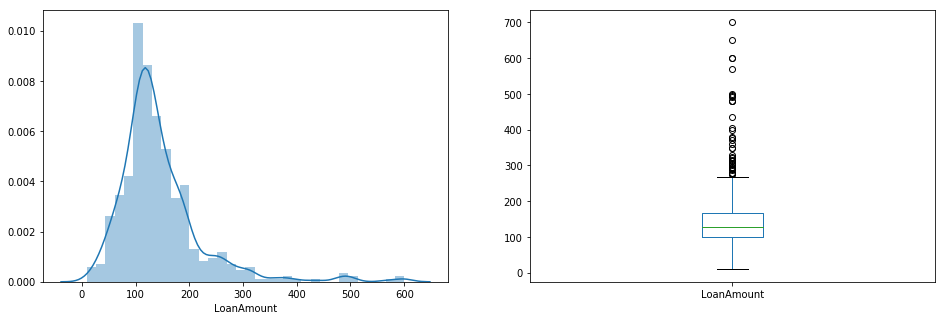

In [16]:
plt.figure(1)
plt.subplot(121)
drop=df.dropna()
sns.distplot(drop['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

A lot of outliers are also present in this variable

## BIVARIANT ANALYSIS

The following should be conditions for higher chances of loan approval:

    *Applicants with high income
    *Applicants who have paid off previous debt
    *The lesser the loan amount
    *The lesser the amount to be paid monthly

#### We will be comparing or finding the relationship the independent variables and the target variable

### Categorical Variables VS Target Variable

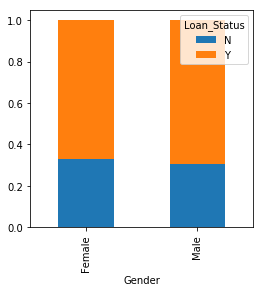

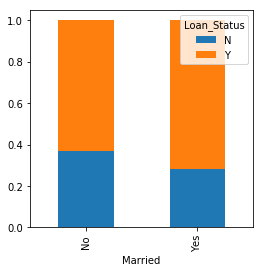

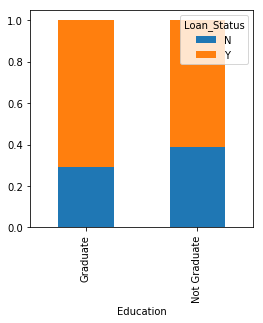

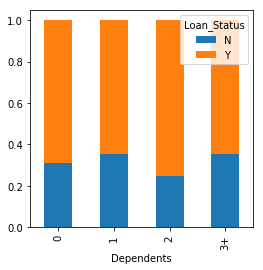

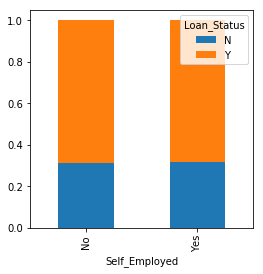

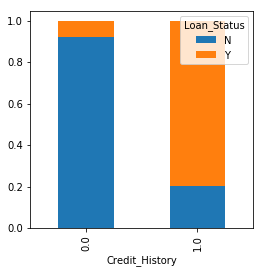

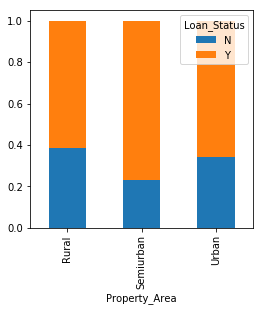

In [17]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4))

Married= pd.crosstab(df['Married'], df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))

Education = pd.crosstab(df['Education'], df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot.bar(stacked=True,figsize=(4,4))

Dependents= pd.crosstab(df['Dependents'], df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4))

Self_Employed= pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize =(4,4))

Credit_History =pd.crosstab(df['Credit_History'], df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4))

Property_Area=pd.crosstab(df['Property_Area'], df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot.bar(stacked=True,figsize = (4,4))

#### It can be inferred that:
    
#### 1)the proportion of male and female applicants is about the same for both approved and unapproved loan applications
#### 2)Proportion of married applicants is higher for the approved loans
#### 3)The proportion of the educational status that is higher for approved loans are the graduates
#### 4)The highest proportion of dependent applicants who have their applications approved are those with 0 dependents
#### 5)Both proportions of Applicants who are self-employed and who are not, equally have their loans approved
#### 6)Those with with no debt record in their credit history are the propotion with the highest loan approval rate
#### 7)In the property area section those who reside in the Semiurban regions have the highest tendency of having their loans approved



### Numerical Variable VS Target Variable

Text(0,0.5,'Percentage')

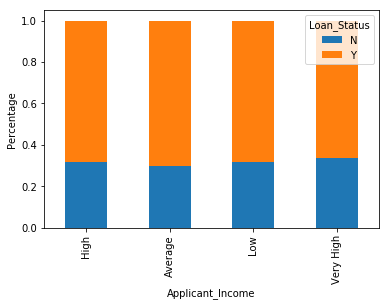

In [18]:
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very High']
df['Income_bin'] = pd.cut(df['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(df['Income_bin'], df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Applicant_Income')
plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

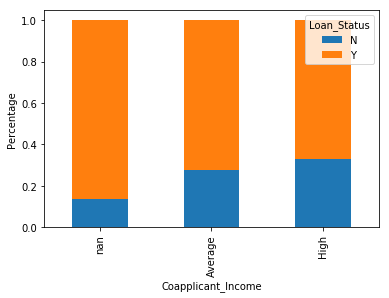

In [19]:
bins=[0, 1000, 3000, 42000]
group=['Low', 'Average', 'High']
df['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels=group)
CoapplicantIncome_bin =pd.crosstab(df['CoapplicantIncome_bin'], df['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')

Text(0,0.5,'Percentage')

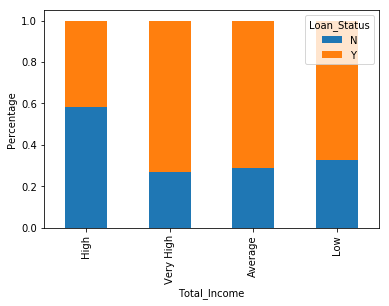

In [20]:
df['total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
df['total_Income_bin'] = pd.cut(df['total_Income'], bins, labels=group)
total_Income_bin = pd.crosstab(df['total_Income_bin'],df['Loan_Status'])
total_Income_bin.div(total_Income_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')


Text(0,0.5,'Percentage')

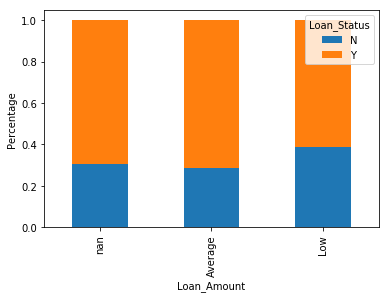

In [21]:
bins=[0,100,200,700]
group=['Low','Average', 'High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins, labels=group)
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'], df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.xlabel('Loan_Amount')
plt.ylabel('Percentage')


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,total_Income,total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [23]:
df=df.drop(['Income_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin', 'total_Income_bin','total_Income'], axis=1)

In [24]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [25]:
df.Dependents.replace('3+',3, inplace=True)

In [26]:
df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [27]:
df_test.Dependents.replace('3+',3, inplace=True)

##### Replace 'Y' with 1 and 'N' with 0 because few models like LOGISTIC REGRESSION takes only numeric values as input

In [28]:
df.Loan_Status.replace('Y',1, inplace=True)
df.Loan_Status.replace('N', 0, inplace=True)

In [29]:
df.Loan_Status.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

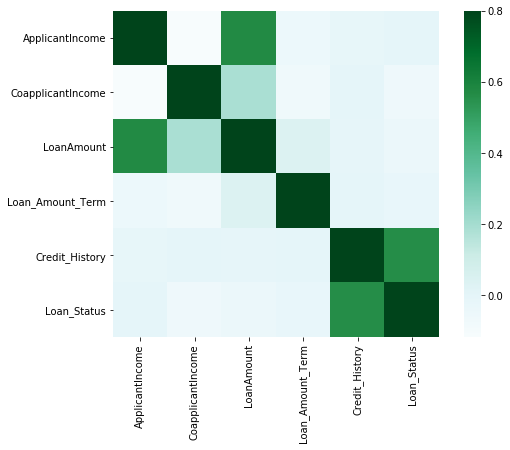

In [30]:
matrix= df.corr()
ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax =0.8, square=True, cmap='BuGn')

##### The most correlated variables are; LoanAmount with ApplicantIncome and Credit_History with Loan_Status. It's also important to state that the LoanAmount is also correlated to Coapplicant 

### DATA AUGUMENTATION

   #### For Numerical variables: imputation using mean or median
   #### For Categorical variables: imputation using mode

Check for null values

In [31]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Categorical Variables

In [32]:
df['Gender'].fillna(df['Gender'].mode()[0] ,inplace=True) #or df['Gender'] = df['Gender'].fillna('Male')

Check to see is changes have been effected on the Gender column

In [33]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df['Married'].fillna(df.Married.mode()[0],inplace=True)

In [35]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df['Dependents'].fillna(df.Dependents.mode()[0], inplace=True)

In [37]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
df['Self_Employed'].fillna(df.Self_Employed.mode()[0], inplace=True)

In [39]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
df['Credit_History'].fillna(df.Credit_History.mode()[0], inplace=True)

In [41]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


#### Numerical Variable

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [43]:
df.LoanAmount.fillna(df['LoanAmount'].mean(), inplace=True)

In [44]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Loan Amount Term though being a numerical variable, has the value of 360 being the most repeated ~85%, as shown below, 

In [45]:
df.Loan_Amount_Term.value_counts(normalize =True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

#### So we fill the nans with mode

In [46]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [47]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
df['LoanAmount'].max()

700.0

In [49]:
df.loc[lambda df: df.LoanAmount == 700,:] #prints/highlights the entire row where the variable loanAmount =700

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1



### HANDLING OUTLIERS

In [50]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


##### From the Standard Deviation above(written as std) we can see the effect/presence of OUTLIERS in variables like ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term, as they all deviate from the mean by very large values. All have rational reason for the presence of OUTLIERS, but/except LoanAmount. So we deal with the OUTLIERS present in LoanAmount

In [51]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].head()

0    4.986426
1    4.852030
2    4.189655
3    4.787492
4    4.948760
Name: LoanAmount_log, dtype: float64

##### Method ONE

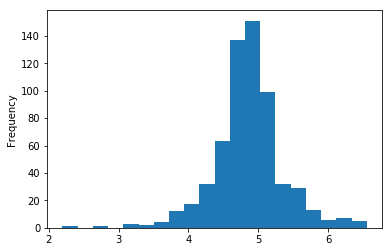

In [52]:
df['LoanAmount_log'].plot(kind='hist', bins=20)

In [53]:
#test['LoanAmount_log'] = np.log(test['LoanAmount'])


##### Method TWO

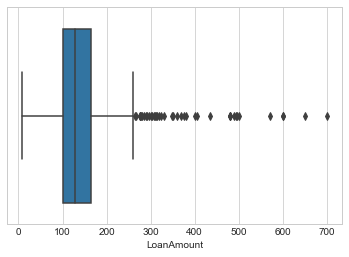

In [54]:
sns.set_style('whitegrid')
sns.boxplot(x= 'LoanAmount', data=df)

In [55]:
df = df[df['LoanAmount'] < 400]

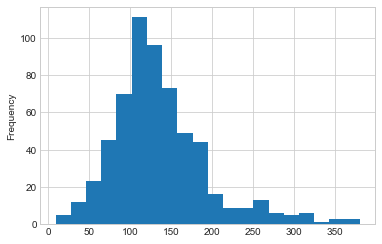

In [56]:
df['LoanAmount'].plot(kind='hist',bins=20)

In [57]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [58]:
df_test.Gender.fillna(df_test.Gender.mode()[0], inplace=True)
df_test.Dependents.fillna(df_test.Dependents.mode()[0], inplace=True)
df_test.Self_Employed.fillna(df_test.Self_Employed.mode()[0], inplace=True)
df_test.LoanAmount.fillna(df_test.LoanAmount.mean(), inplace=True)
df_test.Loan_Amount_Term.fillna(df_test.Loan_Amount_Term.mode()[0], inplace=True)
df_test.Credit_History.fillna(df_test.Credit_History.mode()[0], inplace=True)

In [59]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [60]:
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [61]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


### MODEL BUILDING

In [62]:
df=df.drop('Loan_ID', axis=1)
df_test=df_test.drop('Loan_ID', axis=1)

In [63]:
X = df.drop('Loan_Status',1)
y = df.Loan_Status

In [64]:
X=pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,4.986426,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [65]:
df=pd.get_dummies(df)


In [66]:
df_test = pd.get_dummies(df_test)

In [67]:
from sklearn.model_selection import train_test_split as tts

In [68]:
x_train, x_val, y_train, y_val = tts(X,y)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
model = LogisticRegression()

In [71]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
val_pred = model.predict(x_val)

In [73]:
accuracy_score(y_val, val_pred)

0.8333333333333334

##### So our predictions are almost 80% accurate, that is it predicted about 80% of the loan status correctly and is therefore usable

In [74]:
#Let's go ahead to predict that of the test data
pred_test = model.predict(df_test)


In [75]:
#Importing Submission file which we intend on submitting on the solution checker.
submission=pd.read_csv('sample_submission.csv')

In [76]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0


In [77]:
# We only need the loan ID and the Loan Status of the of the final prediction from the test dataset,
#so it replaces those in the submission dataset

In [78]:
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'] = pred_test
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [79]:
submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

In [80]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [81]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv')